In [1]:
%%time
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

CPU times: user 1.39 s, sys: 1.26 s, total: 2.65 s
Wall time: 2.67 s


In [3]:
%%time
connection = sqlite3.connect("data/wildfire.sqlite")
sql = "select * from fires"
#Df with 
firesfull = pd.read_sql_query(sql, connection)
fires = pd.read_sql_query(
    "select NWCG_REPORTING_AGENCY, CONT_DATE - DISCOVERY_DATE as CONT_TIME, CONT_DOY, \
    LONGITUDE, LATITUDE, SOURCE_SYSTEM_TYPE, DISCOVERY_DATE, FIRE_YEAR,\
    DISCOVERY_DOY, STAT_CAUSE_DESCR, FIRE_SIZE, OWNER_CODE from fires", connection)

CPU times: user 22.6 s, sys: 21.4 s, total: 44 s
Wall time: 50.8 s


<Axes: xlabel='count', ylabel='STAT_CAUSE_DESCR'>

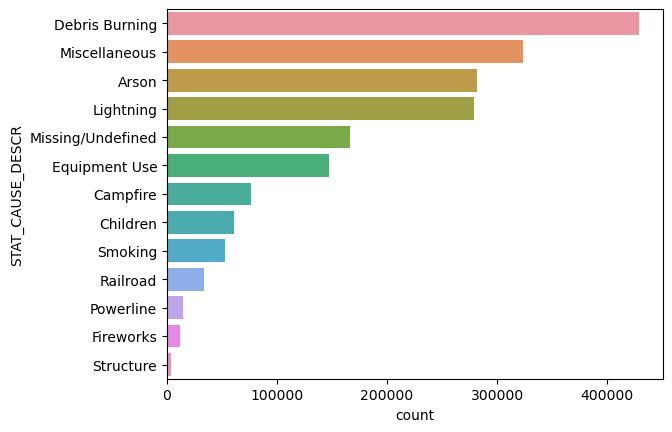

In [8]:
#Value counts per fire type
sns.countplot(y = fires['STAT_CAUSE_DESCR'], order = list(fires['STAT_CAUSE_DESCR'].value_counts().index))  

In [ ]:
#Dropping Miscellaneous and Missing/Undefined
fires2 = fires[(fires["STAT_CAUSE_DESCR"] != "Missing/Undefined") & (fires["STAT_CAUSE_DESCR"] != "Miscellaneous")]

### Feature Distribution: P(X|Y=k)

<Axes: xlabel='STAT_CAUSE_DESCR', ylabel='count'>

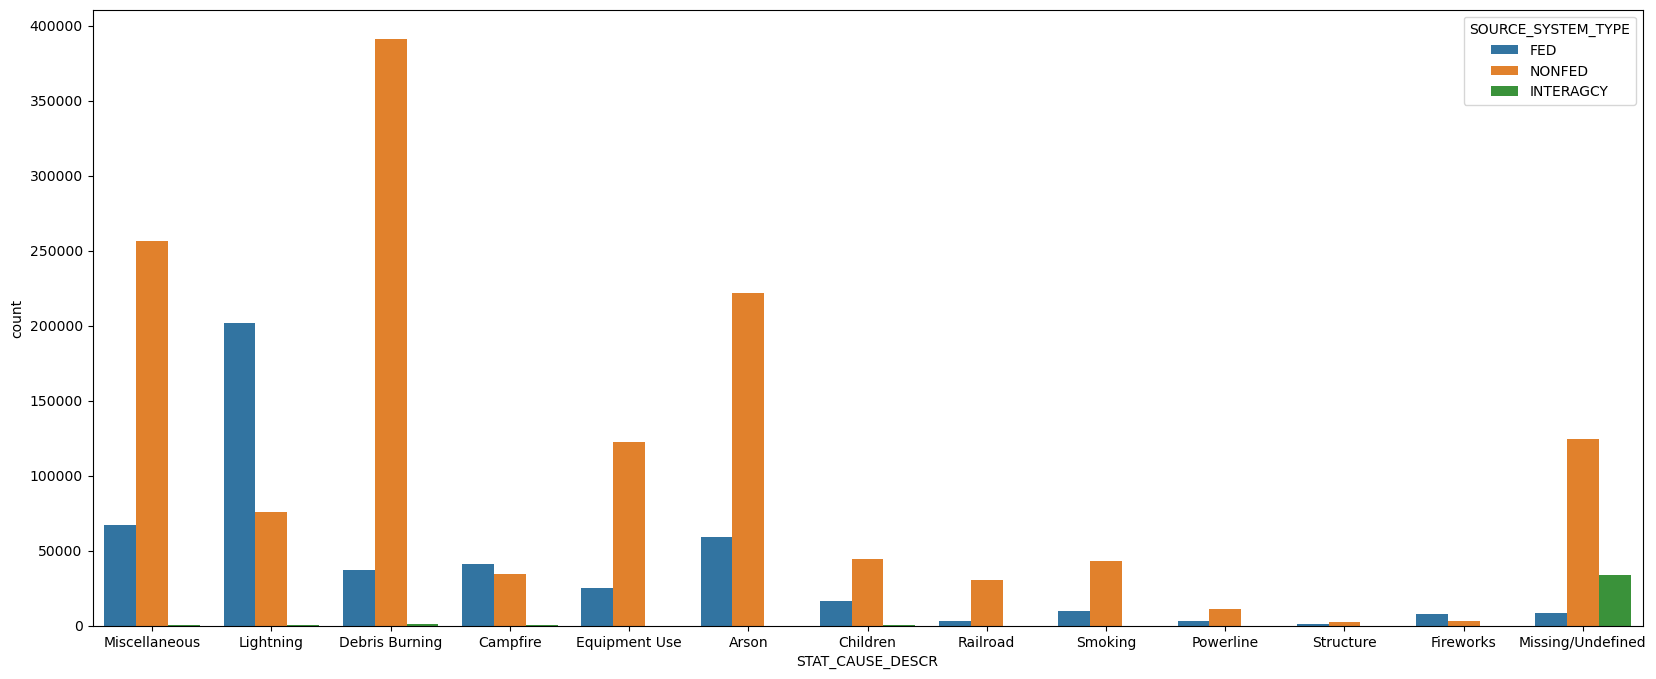

In [6]:
plt.figure(figsize=(20,8))  
sns.countplot(x='STAT_CAUSE_DESCR', data=fires, hue='SOURCE_SYSTEM_TYPE')

<Axes: xlabel='STAT_CAUSE_DESCR', ylabel='count'>

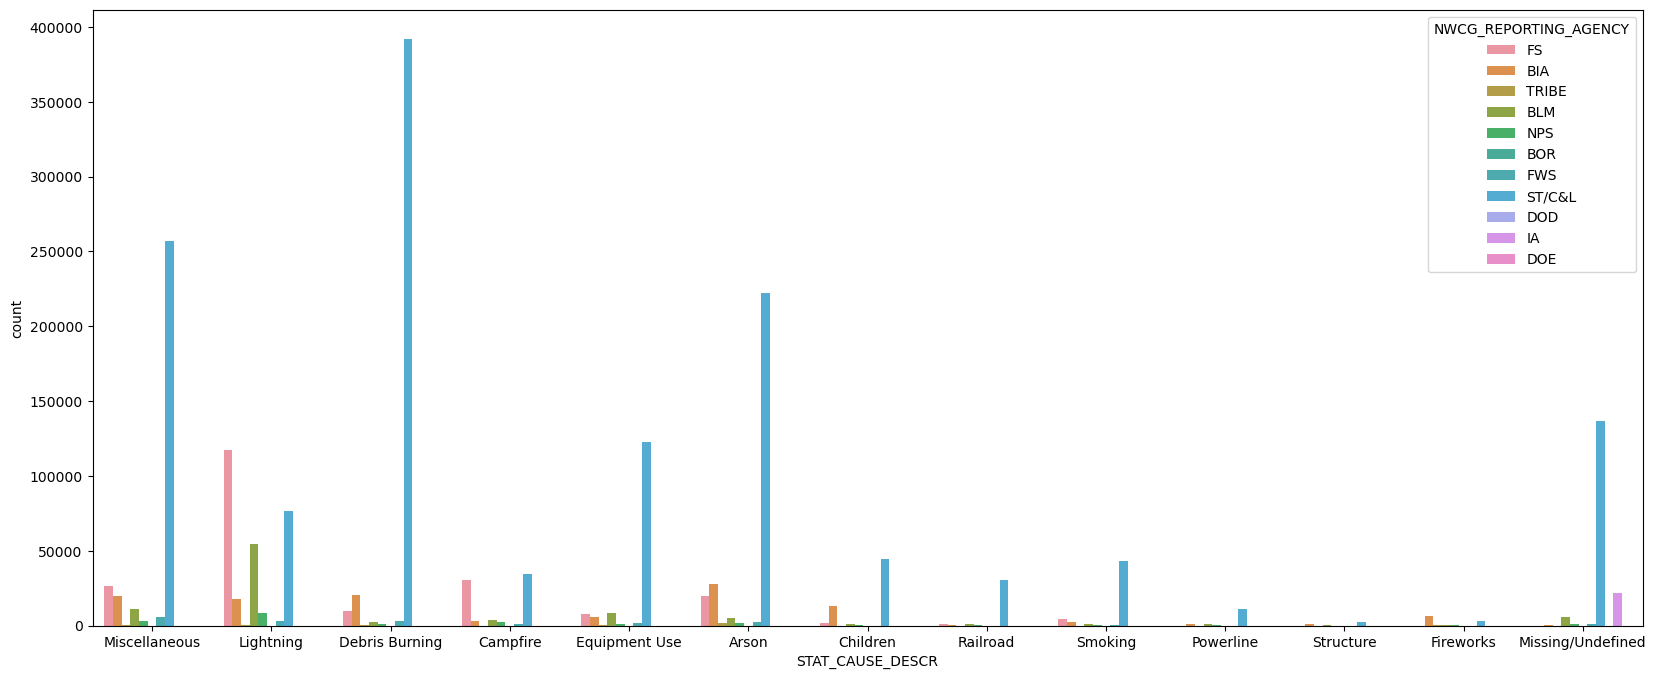

In [7]:
plt.figure(figsize=(20,8))  
sns.countplot(x='STAT_CAUSE_DESCR', data=fires, hue='NWCG_REPORTING_AGENCY')

<Axes: xlabel='STAT_CAUSE_DESCR', ylabel='count'>

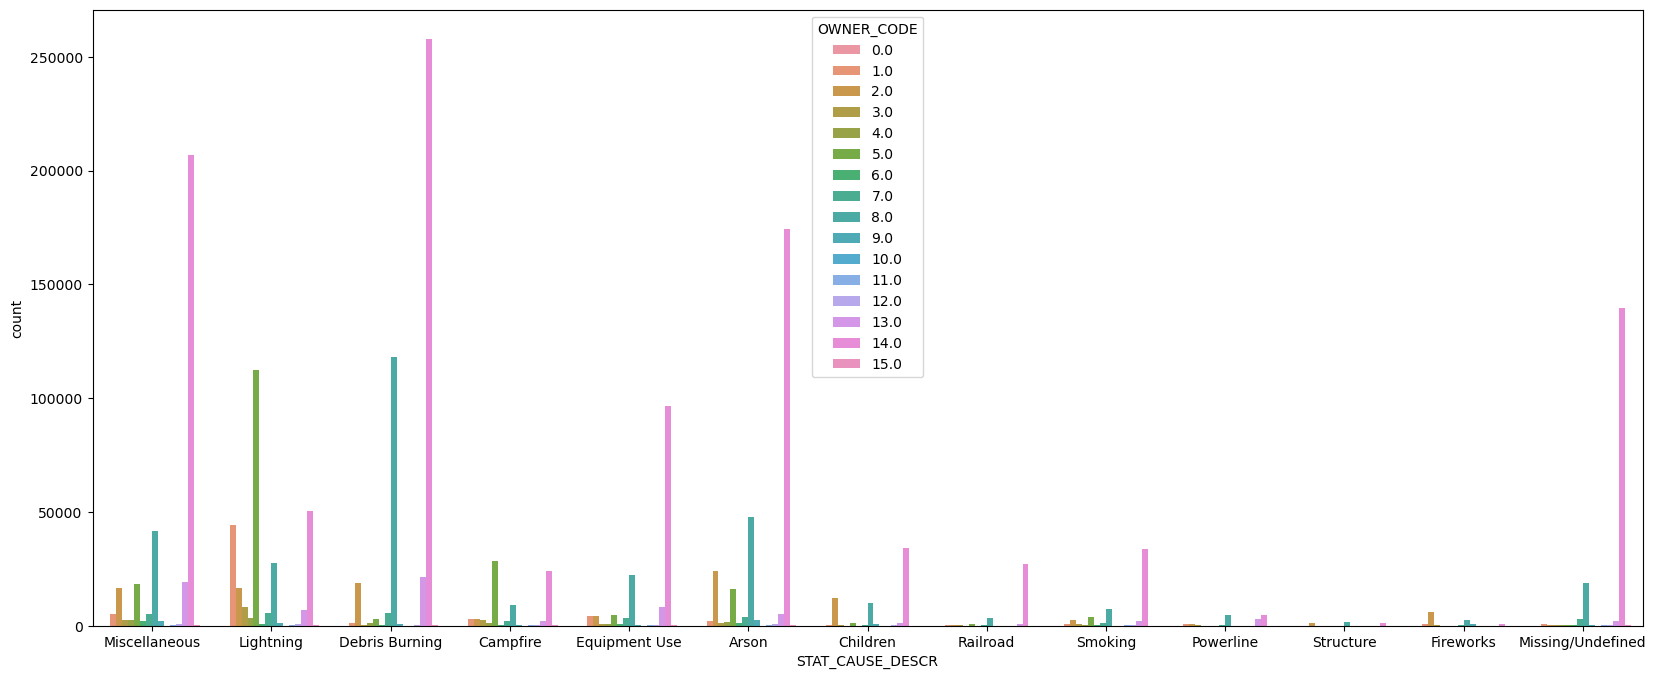

In [9]:
plt.figure(figsize=(20,8))  
sns.countplot(x='STAT_CAUSE_DESCR', data=fires, hue='OWNER_CODE')

<Figure size 40000x40000 with 0 Axes>

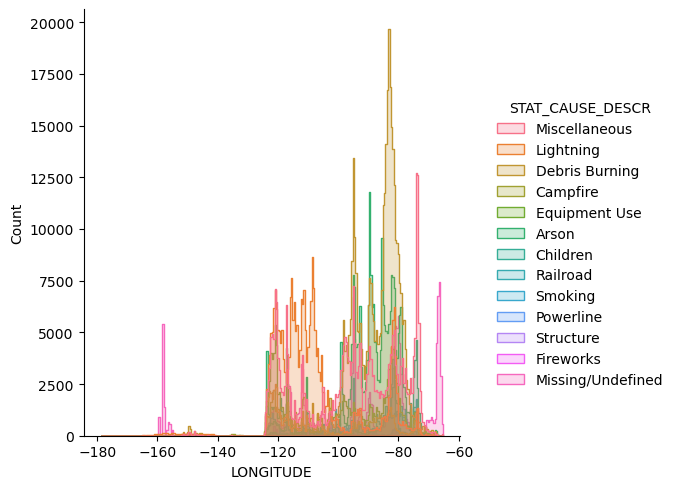

In [16]:
plt.figure(figsize=(400,400)) 
sns.displot(fires, x="LONGITUDE", hue="STAT_CAUSE_DESCR", element="step")
# Can not see clearly
# Want lines instead of bars

<Figure size 4000x4000 with 0 Axes>

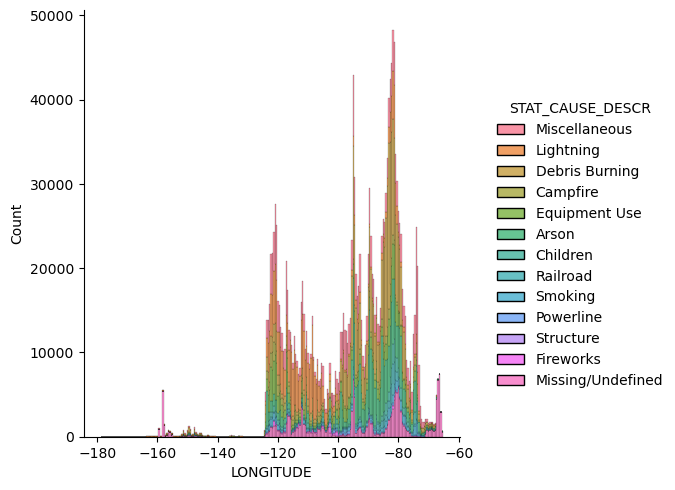

In [18]:
plt.figure(figsize=(40,40)) 
sns.displot(fires, x="LONGITUDE", hue="STAT_CAUSE_DESCR", multiple="stack")
# Can not see clearly
# Want lines instead of bars

In [ ]:
plt.figure(figsize=(40,40)) 
sns.displot(fires, x="LONGITUDE", hue="STAT_CAUSE_DESCR", multiple="dodge")
# Can not see clearly
# Want lines instead of bars

# Does DISCOVERY_TIME Matters

<Figure size 8000x4000 with 0 Axes>

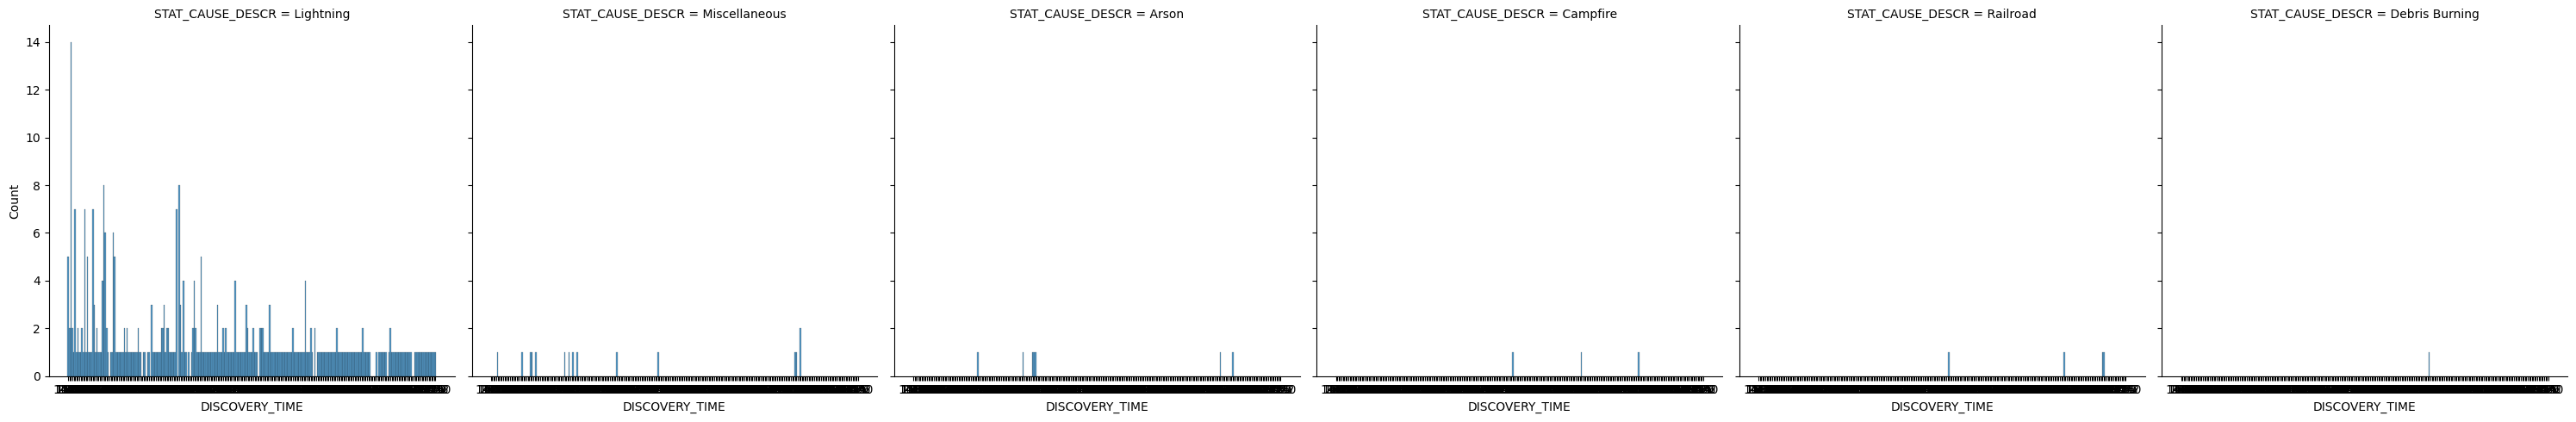

In [44]:
plt.figure(figsize=(80,40))

firesDT=firesfull[["DISCOVERY_TIME","STAT_CAUSE_DESCR"]]
firesDT=firesDT.dropna()
#firesfull.DISCOVERY_TIME
sns.displot(firesDT, x="DISCOVERY_TIME", col="STAT_CAUSE_DESCR")